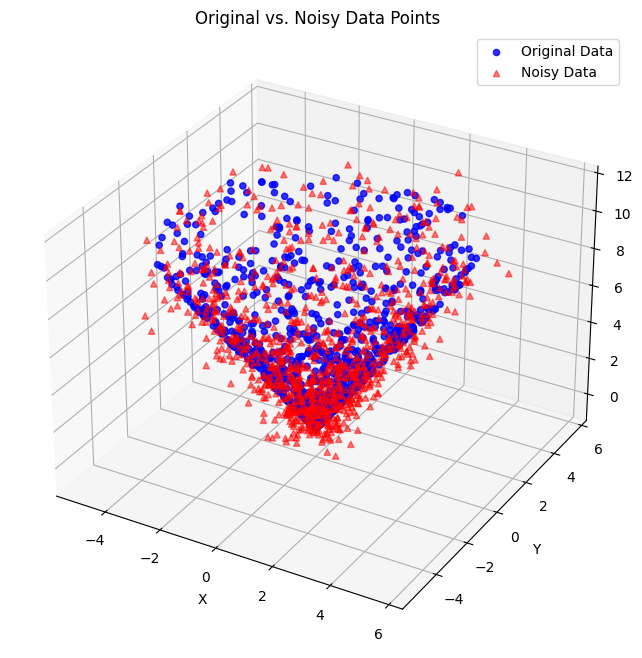

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def generate_cone_points(num_points=1000, height=10, radius=5):

    theta = np.random.uniform(0, 2 * np.pi, num_points)
    z = np.random.uniform(0, height, num_points)
    r = (radius / height) * z
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y, z

# Generate original cone points
x, y, z = generate_cone_points()

# Add Gaussian noise to the original points
noise_scale = 0.5
x_noisy = x + np.random.normal(0, noise_scale, x.shape)
y_noisy = y + np.random.normal(0, noise_scale, y.shape)
z_noisy = z + np.random.normal(0, noise_scale, z.shape)

# Plotting the original and noisy data points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot original points
ax.scatter(x, y, z, color='blue', label='Original Data', alpha=0.8, marker='o')

# Plot noisy points
ax.scatter(x_noisy, y_noisy, z_noisy, color='red', label='Noisy Data', alpha=0.5, marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Original vs. Noisy Data Points')
plt.show()


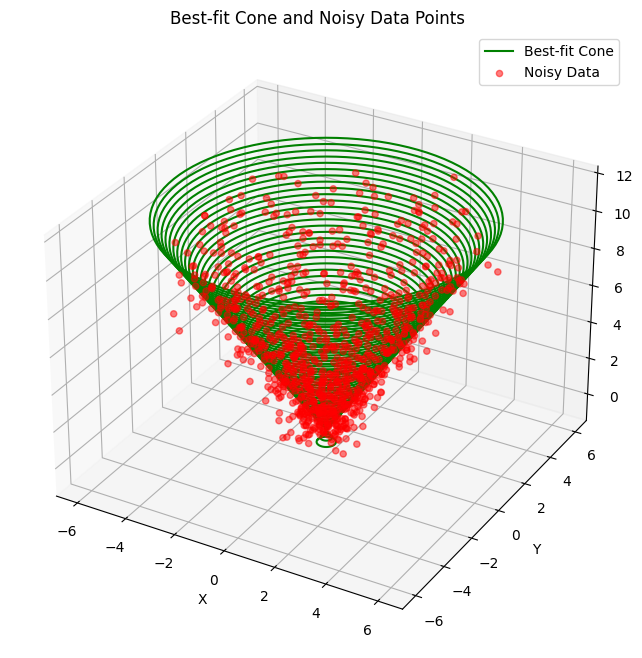

Best-fit parameters (px, py, pz, angle): [3.04132180e-02 2.91648919e-06 3.37503075e-02 4.84882546e-01]


In [64]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import minimize


def cone_fit(params, x, y, z):

    px, py, pz, angle = params
    r = np.sqrt((x - px)**2 + (y - py)**2)
    ideal_z = pz + r / np.tan(angle)
    return np.sum((z - ideal_z)**2)



# Optimize cone parameters
initial_guess = [0, 0, 5, np.pi / 4]  # Guess for apex at middle height and 45 degrees angle
result = minimize(cone_fit, initial_guess, args=(x_noisy, y_noisy, z_noisy))
best_params = result.x

# Visualization
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
theta_fit = np.linspace(0, 2*np.pi, 100)
z_levels = np.linspace(np.min(z_noisy), np.max(z_noisy), num=50)

# Plot the best-fit cone using multiple z-levels
px, py, pz, angle = best_params
for z_level in z_levels:
    r_level = (z_level - pz) * np.tan(angle)
    x_level = px + r_level * np.cos(theta_fit)
    y_level = py + r_level * np.sin(theta_fit)
    z_level_array = np.full_like(x_level, z_level)
    ax.plot(x_level, y_level, z_level_array, color='green', label='Best-fit Cone' if z_level == z_levels[0] else "")

# Plot noisy data points
ax.scatter(x_noisy, y_noisy, z_noisy, color='red', alpha=0.5, label='Noisy Data')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.title('Best-fit Cone and Noisy Data Points')
plt.show()

print("Best-fit parameters (px, py, pz, angle):", best_params)
